# Regression linéaire

In [27]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=1, noise=5, random_state=42)

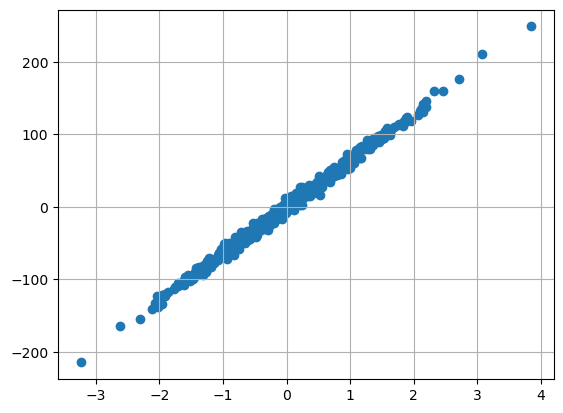

In [28]:
import matplotlib.pyplot as plt 

plt.scatter(X,y)
plt.grid()

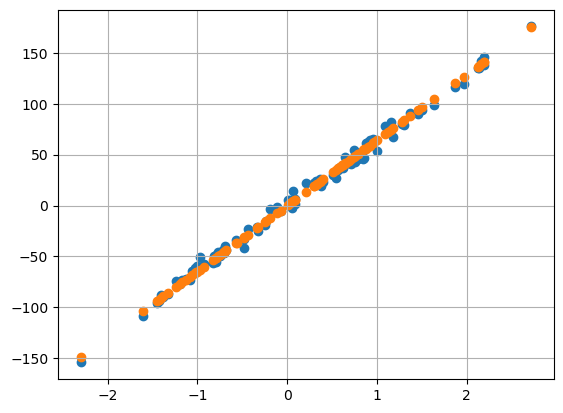

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.grid()

Epoch 1/50
13/13 [==============================] - 0s 13ms/step - loss: 3317.4875 - mean_squared_error: 3317.4875 - val_loss: 2885.7883 - val_mean_squared_error: 2885.7883
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 2043.0535 - mean_squared_error: 2043.0535 - val_loss: 1767.1288 - val_mean_squared_error: 1767.1288
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 1259.6637 - mean_squared_error: 1259.6637 - val_loss: 1088.3560 - val_mean_squared_error: 1088.3560
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 784.5193 - mean_squared_error: 784.5193 - val_loss: 676.7202 - val_mean_squared_error: 676.7202
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 494.2168 - mean_squared_error: 494.2168 - val_loss: 419.8517 - val_mean_squared_error: 419.8517
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 312.7511 - mean_squared_error: 312.7511 - val_loss: 264.7303 - val_mean_squ

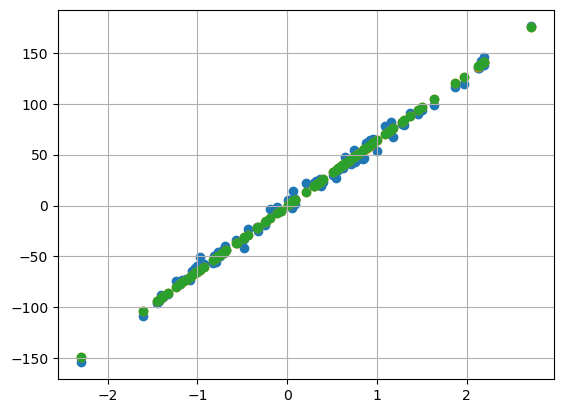

In [32]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential 

modelnn = Sequential()

# output 
modelnn.add(Dense(units=1, activation="linear"))

modelnn.compile(optimizer="sgd", loss="mse", metrics=["mean_squared_error"])

hist = modelnn.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

y_prednn = modelnn.predict(x_test)

plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_prednn)
plt.grid()


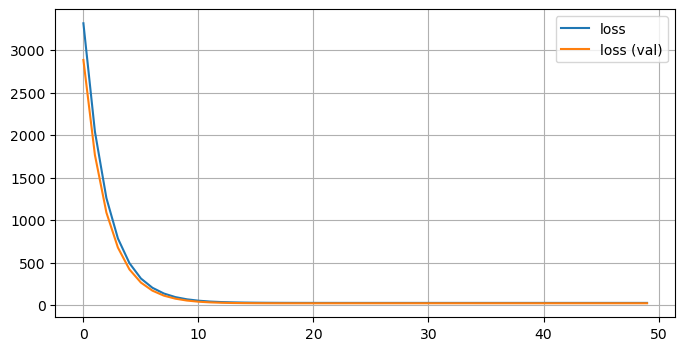

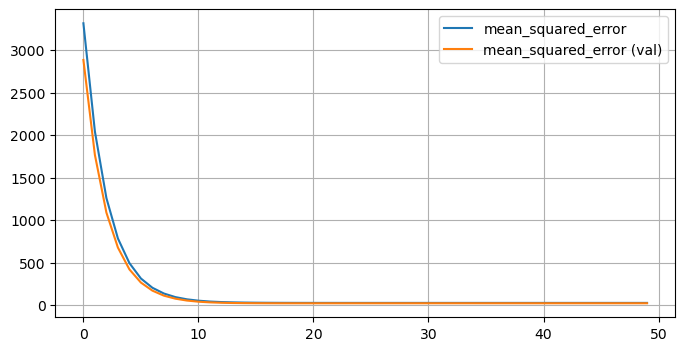

In [35]:
hist.history.keys()

plt.figure(figsize=(8,4))
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="loss (val)")
plt.grid()
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(hist.history["mean_squared_error"],label="mean_squared_error")
plt.plot(hist.history["val_mean_squared_error"],label="mean_squared_error (val)")
plt.grid()

plt.legend()

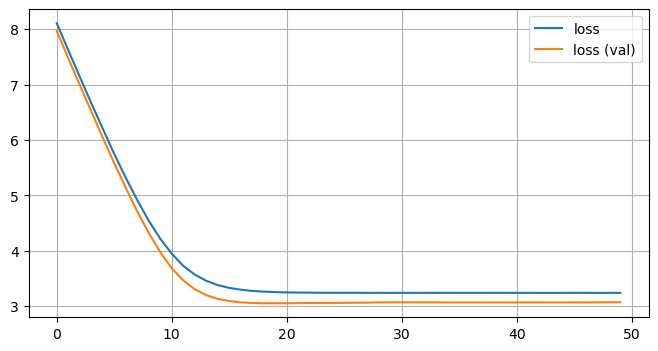

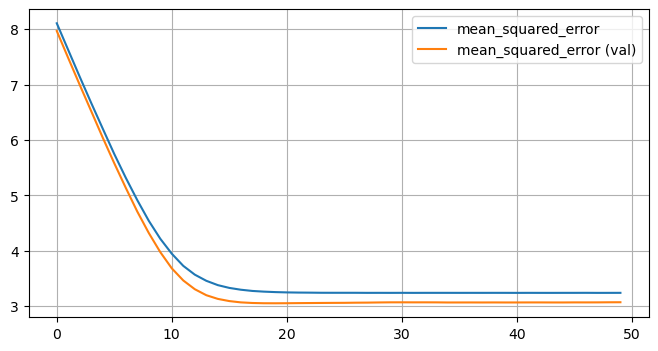

In [36]:
import numpy as np
plt.figure(figsize=(8,4))
plt.plot(np.log(hist.history["loss"]),label="loss")
plt.plot(np.log(hist.history["val_loss"]),label="loss (val)")
plt.grid()
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(np.log(hist.history["mean_squared_error"]),label="mean_squared_error")
plt.plot(np.log(hist.history["val_mean_squared_error"]),label="mean_squared_error (val)")
plt.grid()
plt.legend()

# classification

In [37]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=20)


In [40]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print( classification_report(y_pred, y_test) )

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        52
           1       0.79      0.92      0.85        48

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100



In [54]:
model_cl = Sequential()
model_cl.add(Dense(units=1, activation="sigmoid"))

model_cl.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

histcl = model_cl.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

y_prednn = model_cl.predict(x_test)

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.6968 - accuracy: 0.6325 - val_loss: 0.7776 - val_accuracy: 0.5600
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.6500 - val_loss: 0.7509 - val_accuracy: 0.5600
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.6650 - val_loss: 0.7263 - val_accuracy: 0.5800
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.6800 - val_loss: 0.7044 - val_accuracy: 0.6300
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.6900 - val_loss: 0.6849 - val_accuracy: 0.6500
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5817 - accuracy: 0.7150 - val_loss: 0.6676 - val_accuracy: 0.6700
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5656 - accuracy: 0.7275 - val_loss: 0.6513 - val_accuracy: 0.6900
Epoch 8/100


In [49]:
print( classification_report(np.round(y_prednn), y_test) )

              precision    recall  f1-score   support

         0.0       0.93      0.77      0.85        53
         1.0       0.79      0.94      0.85        47

    accuracy                           0.85       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100



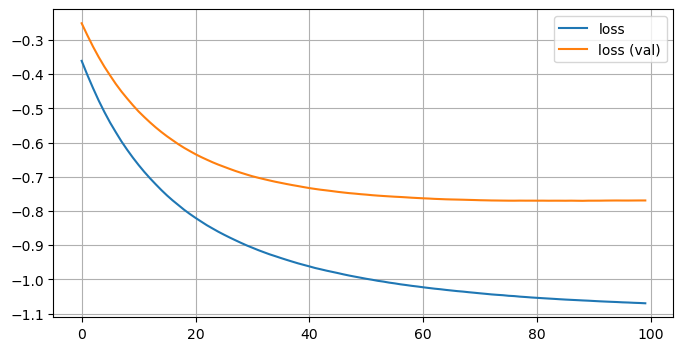

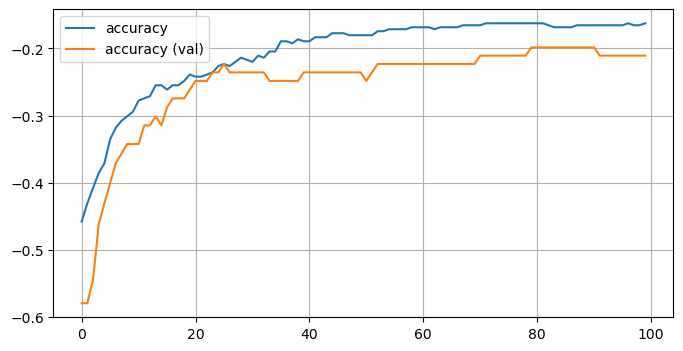

In [55]:
import numpy as np
plt.figure(figsize=(8,4))
plt.plot(np.log(histcl.history["loss"]),label="loss")
plt.plot(np.log(histcl.history["val_loss"]),label="loss (val)")
plt.grid()
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(np.log(histcl.history["accuracy"]),label="accuracy")
plt.plot(np.log(histcl.history["val_accuracy"]),label="accuracy (val)")
plt.grid()
plt.legend()

In [57]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("train")
print("x",x_train.shape)
print("y",y_train.shape)

print("test")
print("x",x_test.shape)
print("y",y_test.shape)

train
x (60000, 28, 28)
y (60000,)
test
x (10000, 28, 28)
y (10000,)


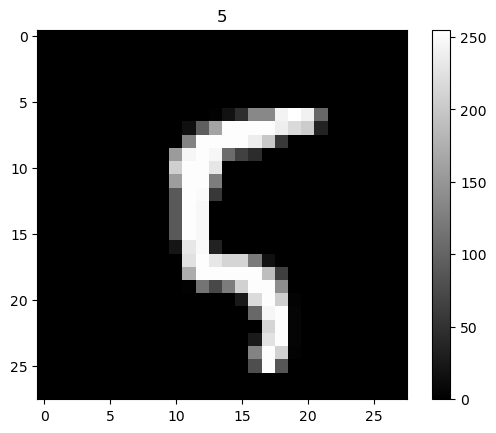

In [60]:
n = 100 
plt.imshow(x_train[n,:,:],cmap="gray")
plt.title(y_train[n])
plt.colorbar()

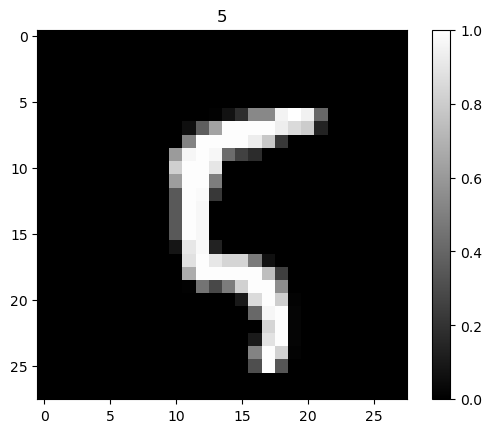

In [61]:
x_train = x_train / 255.0
x_test = x_test / 255.0

plt.imshow(x_train[n,:,:],cmap="gray")
plt.title(y_train[n])
plt.colorbar()

In [62]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [72]:
from tensorflow.keras.layers import Flatten, Dropout
model = Sequential()

# input 
model.add(Flatten(input_shape=(28,28)))

# hidden
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(1/2))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(1/2))
# output
model.add(Dense(units=10, activation="softmax"))

# compile 
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

# fit
hist = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=128, epochs=20)

# prediction
y_mnist = model.predict(x_test)


Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.6380 - accuracy: 0.8012 - val_loss: 0.2087 - val_accuracy: 0.9360
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3138 - accuracy: 0.9100 - val_loss: 0.1485 - val_accuracy: 0.9543
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2587 - accuracy: 0.9248 - val_loss: 0.1303 - val_accuracy: 0.9616
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2232 - accuracy: 0.9360 - val_loss: 0.1209 - val_accuracy: 0.9623
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2002 - accuracy: 0.9417 - val_loss: 0.1078 - val_accuracy: 0.9667
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1870 - accuracy: 0.9448 - val_loss: 0.1032 - val_accuracy: 0.9698
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1773 - accuracy: 0.9477 - val_loss: 0.0972 - val_accuracy: 0.9698
Epoch 

In [64]:
y_mnist

array([[2.4560461e-06, 2.7767665e-11, 2.0755170e-04, ..., 9.8956919e-01,
        3.5048524e-04, 9.6900680e-05],
       [1.5355375e-06, 1.7100583e-04, 9.9979210e-01, ..., 2.7298172e-18,
        6.0377650e-09, 8.7675140e-14],
       [3.5280593e-07, 9.9721318e-01, 2.6739211e-04, ..., 6.5927324e-04,
        1.4737566e-03, 1.4846300e-05],
       ...,
       [3.9195504e-11, 3.2542618e-13, 1.0179778e-09, ..., 1.8299652e-06,
        1.2552118e-05, 3.7217877e-04],
       [1.2820816e-07, 2.3325415e-09, 1.6586034e-09, ..., 1.8609396e-07,
        2.0645800e-04, 1.7829660e-08],
       [1.6805944e-07, 4.1220902e-11, 1.6715305e-06, ..., 2.7021831e-11,
        4.2774528e-10, 4.5721114e-11]], dtype=float32)

In [73]:
y_mnist_c = np.argmax(y_mnist, axis=-1)

print(classification_report(y_mnist_c, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1005
           1       0.99      0.98      0.99      1145
           2       0.98      0.97      0.98      1037
           3       0.98      0.97      0.98      1017
           4       0.98      0.98      0.98       980
           5       0.98      0.98      0.98       886
           6       0.98      0.98      0.98       952
           7       0.97      0.98      0.98      1023
           8       0.96      0.98      0.97       960
           9       0.96      0.98      0.97       995

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [74]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 11

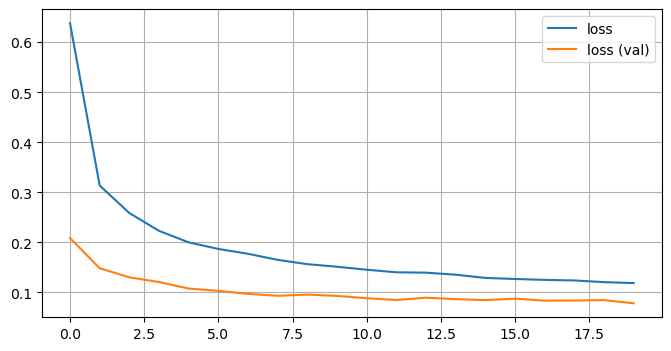

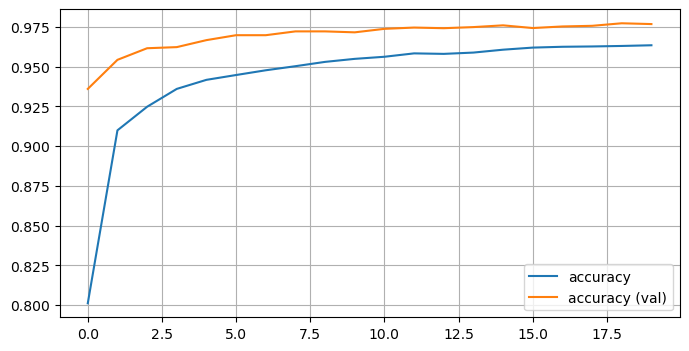

In [75]:
plt.figure(figsize=(8,4))
plt.plot((hist.history["loss"]),label="loss")
plt.plot((hist.history["val_loss"]),label="loss (val)")
plt.grid()
plt.legend()

plt.figure(figsize=(8,4))
plt.plot((hist.history["accuracy"]),label="accuracy")
plt.plot((hist.history["val_accuracy"]),label="accuracy (val)")
plt.grid()
plt.legend()

# convolution

In [92]:
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical

(x_tra, y_tra), (x_tes, y_tes) = mnist.load_data()
y_train = to_categorical(y_tra)
y_test = to_categorical(y_tes)

x_train = np.expand_dims(x_tra,axis=-1).astype("float32")/255.0
x_test = np.expand_dims(x_tes,axis=-1).astype("float32")/255.0

modelconv = Sequential()

modelconv.add(Conv2D(filters=32, padding="same", kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
modelconv.add(MaxPool2D(pool_size=(2,2)))

modelconv.add(Conv2D(filters=12, padding="same", kernel_size=(3,3), activation="relu"))
modelconv.add(MaxPool2D(pool_size=(2,2)))

modelconv.add(Flatten())
modelconv.add(Dense(units=10, activation="relu"))
modelconv.add(Dense(units=10, activation="softmax"))

# compile 
modelconv.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

modelconv.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 12)        3468      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 7, 7, 12)          0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 588)               0         
                                                                 
 dense_24 (Dense)            (None, 10)              

In [93]:

# fit
hist = modelconv.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 23s 47ms/step - loss: 0.4982 - accuracy: 0.8479 - val_loss: 0.1627 - val_accuracy: 0.9528
Epoch 2/5
469/469 [==============================] - 25s 53ms/step - loss: 0.1413 - accuracy: 0.9563 - val_loss: 0.1060 - val_accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 26s 56ms/step - loss: 0.0996 - accuracy: 0.9693 - val_loss: 0.0743 - val_accuracy: 0.9761
Epoch 4/5
469/469 [==============================] - 25s 54ms/step - loss: 0.0828 - accuracy: 0.9743 - val_loss: 0.0661 - val_accuracy: 0.9789
Epoch 5/5
469/469 [==============================] - 25s 52ms/step - loss: 0.0725 - accuracy: 0.9781 - val_loss: 0.0572 - val_accuracy: 0.9827


In [94]:
# prediction
y_conv = model.predict(x_test)


y_conv_c = np.argmax(y_conv, axis=-1)

print(classification_report(y_conv_c, y_tes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       988
           1       0.99      0.99      0.99      1138
           2       0.98      0.98      0.98      1029
           3       0.98      0.98      0.98      1012
           4       0.98      0.98      0.98       976
           5       0.98      0.97      0.97       898
           6       0.98      0.98      0.98       954
           7       0.98      0.98      0.98      1030
           8       0.96      0.98      0.97       962
           9       0.97      0.97      0.97      1013

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



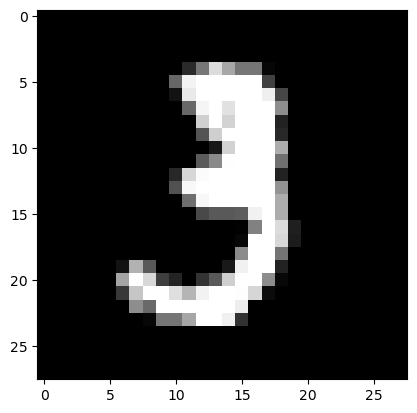

In [96]:
from tensorflow.keras.models import Model



n = 10
x_t = x_train[n,:,:,:]

plt.imshow(x_t,cmap="gray")



In [118]:
inp = modelconv.input 
m=10
lay = modelconv.layers[1].output
mm = Model(inputs=inp, outputs=lay)

example_image = x_test[m].reshape(1, 28, 28, 1)
activation = mm.predict(example_image)

1/1 [==============================] - 0s 85ms/step


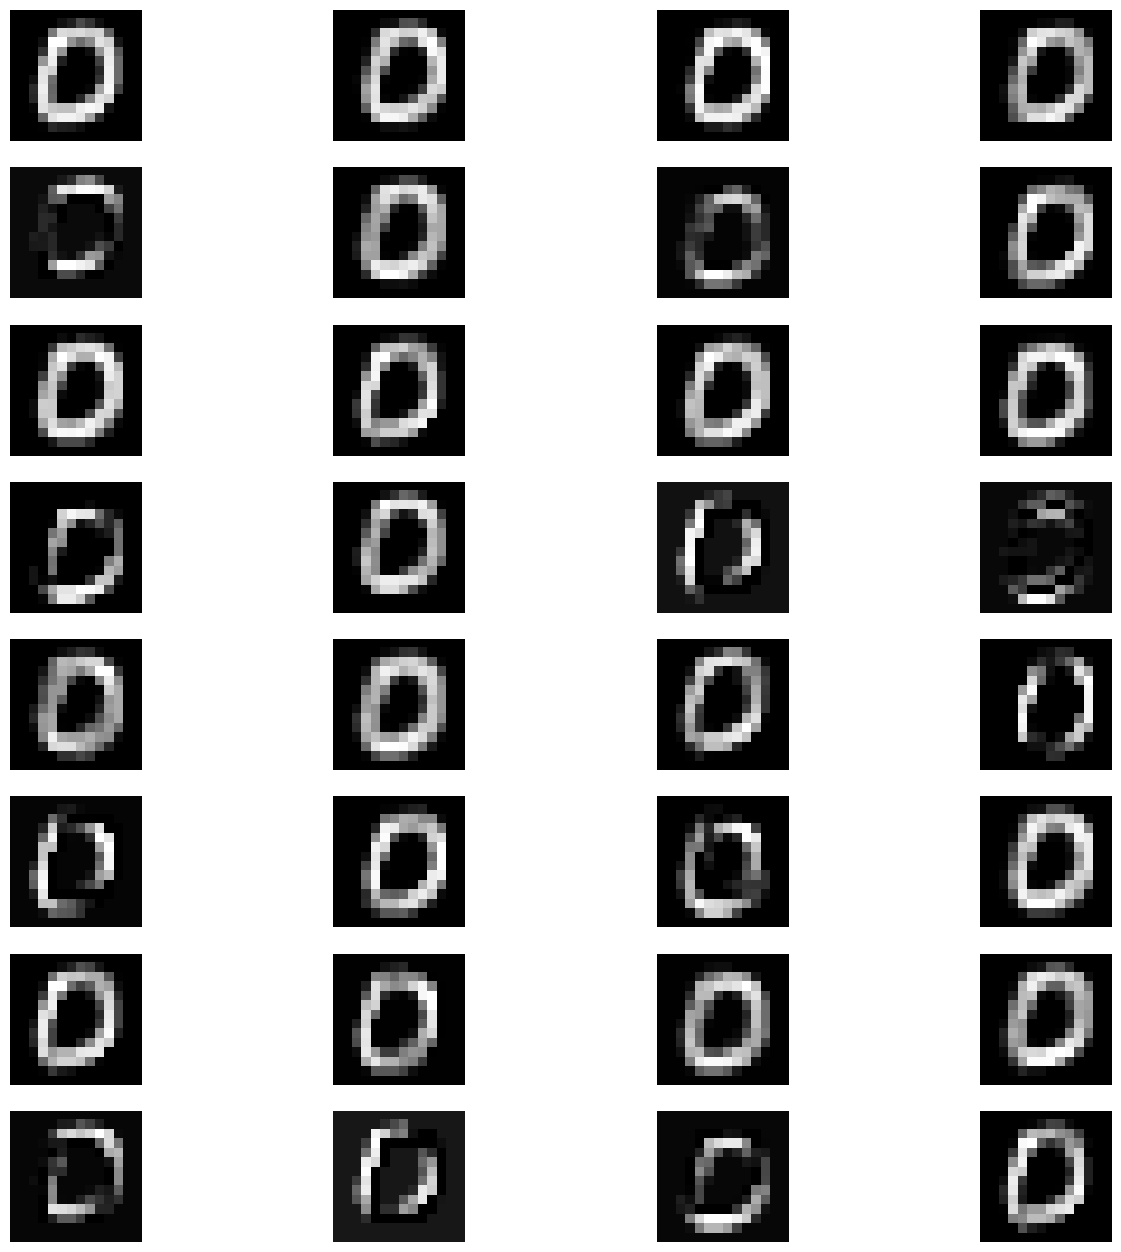

In [119]:
plt.figure(figsize=(16,16))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(activation[0,:,:,n],cmap="gray")
    plt.axis(False)

In [121]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


# train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255

In [124]:
train_images[0].astype('float32') / 255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

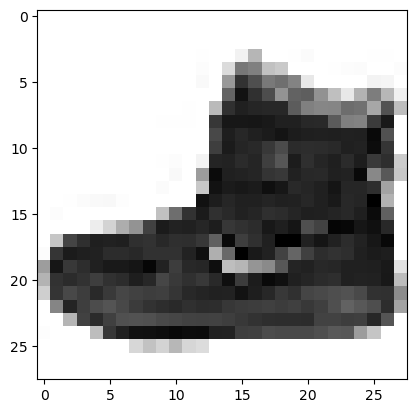